# Data processing
In this notebook, I am loading a list of molecules I obtained from ChEMBL and processing them to make sure I have:

- Standard SMILES representation of the compound
- InChIKey associated to the compound

In [37]:
# In this codeblock I will import the necessary packages and specify the paths to relevant folders
import pandas as pd
from rdkit import Chem
import matplotlib.pyplot as plt
import sys
sys.path.append('../src/')  # Adjust the path as necessary
from smile_processing import standardise_smiles


In [15]:
# In this codeblock I will load the data from the /data folder to a Pandas dataframe and understand which headers it has
csv_file_path = '/Users/sohierelsafty/workspace/Aqueous solubility prediction/Aqueous-solubility-prediction/data/reference_library.csv'
df = pd.read_csv(csv_file_path)

print("Headers in the CSV file:")
print(df.columns)

Headers in the CSV file:
Index(['smiles'], dtype='object')


In [16]:
# In this codeblock I will convert the molecules to standard SMILES by using the function standardise_smiles from /src
# I will import the function directly from src, not copying it here

molecule_smiles = df.dropna()
smiles = molecule_smiles.apply(standardise_smiles)
print(smiles)

[22:58:23] Can't kekulize mol.  Unkekulized atoms: 3 7


                                                smiles
0                             CCCCNC(=S)N/N=C/c1sccc1C
1                Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1
2                   O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl
3         O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1
4    CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1
..                                                 ...
995  CCCn1c(-c2cnc(Nc3ccc(C)nc3)c(Cl)c2)nc2cccc(Cl)c21
996           CN(Cc1cccc2ccccc12)Cn1nc(-c2ccncc2)oc1=O
997  O=C(N[C@@H](CSCc1ccccc1)C(=O)Nc1ccc(C2S/C(=N\c...
998  CN1CC[C@]23CCCC[C@H]2[C@H]1Cc1ccc(Oc2ccccc2F)cc13
999  O=C(CN1C(=O)/C(=C/c2ccco2)SC1=S)Nc1ccc(C(=O)O)...

[1000 rows x 1 columns]


In [30]:
# In this codeblock I will get the Inchikey representation of the molecules using the RDKIT package

def smiles_to_inchikey(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        inchi = Chem.MolToInchi(mol)
        inchi_key = Chem.InchiToInchiKey(inchi)
        return inchi_key
    else:
        return None


df['InChIKey'] = df['smiles'].apply(smiles_to_inchikey)
print(df[['smiles', 'InChIKey']])


[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Charges were rearranged; Omitted undefined stereo

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Charges were rearranged

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Charges were rearranged

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Charges were rearranged

[23:14:31] WARNING: Charges were rearranged

[23:14:31] WARNING: Charges were rearranged

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WAR

                                                smiles  \
0                         CCCCNC(=S)N/N=C/C1=C(C)C=CS1   
1           CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1   
2             O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl   
3    O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...   
4    CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...   
..                                                 ...   
995  CCCN1C(C2=CN=C(NC3=CC=C(C)N=C3)C(Cl)=C2)=NC2=C...   
996   CN(CC1=CC=CC2=CC=CC=C12)CN1N=C(C2=CC=NC=C2)OC1=O   
997  O=C(N[C@@H](CSCC1=CC=CC=C1)C(=O)NC1=CC=C(C2S/C...   
998  CN1CC[C@]23CCCC[C@H]2[C@H]1CC1=CC=C(OC2=CC=CC=...   
999  O=C(CN1C(=O)/C(=C/C2=CC=CO2)SC1=S)NC1=CC=C(C(=...   

                        InChIKey  
0    SUTWUYBMBWPLMW-MDWZMJQESA-N  
1    RIYHJWOTNJXDLV-UHFFFAOYSA-N  
2    OGNBARHGQVMGGX-UHFFFAOYSA-N  
3    WQEXDIRUOYNDCM-UHFFFAOYSA-N  
4    YEGVLLQDOGYWDQ-OAHLLOKOSA-N  
..                           ...  
995  RGKVPYQYBUAAEH-UHFFFAOYSA-N  
996  VTRFEMUYHTXFEQ-UHF

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Charges were rearranged; Omitted undefined stereo

[23:14:31] WARNING: Charges were rearranged

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Charges were rearranged

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Charges were rearranged

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Charges were rearranged; Omitted undefined stereo

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Omitted undefined stereo

[23:14:31] WARNING: Omitted undef

In [32]:
# In this codeblock I will save the data as a .csv file containing only the standard smiles and the inchikey as columns. 
# All data will be saved with informative names in the /data folder

new_file = '/Users/sohierelsafty/workspace/Aqueous solubility prediction/Aqueous-solubility-prediction/data/smiles_with _inchikey.csv'
with open (new_file, 'w', newline='', encoding='utf-8') as file:
    file.write('Smiles, InchIKey\n')

    for index, row in df.iterrows():
        file.write(f"{row['smiles']}, {row['InChIKey']}\n")

# Model Bias Evaluation
Now, I will use the predictions I got from the Ersilia Model Hub on the dataset of 1000 molecules curated above and see how are they distributed in their space (which might be 0 to 1 for probabilities, or different for regression models)

In [36]:
# In this codeblock I will load the predictions I've run on Ersilia and saved in the /data folder
prediction_df = pd.read_csv("/Users/sohierelsafty/workspace/Aqueous solubility prediction/Aqueous-solubility-prediction/data/model_prediction.csv")

print(prediction_df.head())

                      InchIKey  \
0  SUTWUYBMBWPLMW-MDWZMJQESA-N   
1  RIYHJWOTNJXDLV-UHFFFAOYSA-N   
2  OGNBARHGQVMGGX-UHFFFAOYSA-N   
3  WQEXDIRUOYNDCM-UHFFFAOYSA-N   
4  YEGVLLQDOGYWDQ-OAHLLOKOSA-N   

                                              smiles  solubility  
0                       CCCCNC(=S)N/N=C/C1=C(C)C=CS1      -3.454  
1         CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1      -4.502  
2           O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl      -2.900  
3  O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...      -4.777  
4  CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...      -4.473  


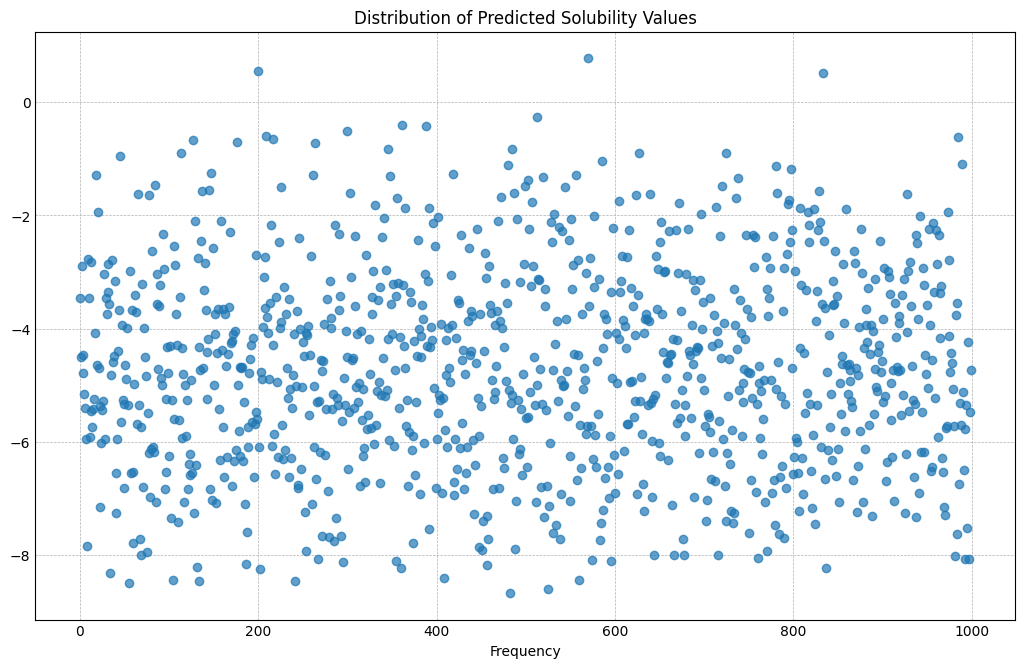

In [44]:
# In this codeblock I will create the necessary plots with MatPlotLib to observe the distribution of predicted values

df = pd.DataFrame(prediction_df)

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['solubility'], alpha=0.7)
plt.title("Distribution of Predicted Solubility Values")
plt.xlabel('Solubility')
plt.xlabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()